## Assignment:  Calculate any MACD and signal values of a stock with buy/sell recommendation based on MACD movement.

### Installing the required libraries.

In [1]:
!pip install stockstats

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns

### Dataset information: Stock price data of BPCL stock at day level.

In [3]:
data=pd.read_csv("/home/mukut/Documents/data/BPCL.csv")

# Overview of the dataset.

In [4]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BPCL,EQ,381.20,405.00,407.00,393.05,397.75,399.25,399.32,8720,3.482029e+11,NaN,NaN,NaN
1,2000-01-04,BPCL,EQ,399.25,397.75,397.75,367.40,377.45,370.50,375.71,22820,8.573699e+11,NaN,NaN,NaN
2,2000-01-05,BPCL,EQ,370.50,350.00,385.00,350.00,360.10,359.95,359.96,152538,5.490785e+12,NaN,NaN,NaN
3,2000-01-06,BPCL,EQ,359.95,362.00,384.00,362.00,381.65,380.30,380.10,59554,2.263623e+12,NaN,NaN,NaN
4,2000-01-07,BPCL,EQ,380.30,369.00,390.00,366.00,381.50,379.85,378.33,43187,1.633890e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,BPCL,EQ,423.05,426.00,428.35,417.55,417.60,418.90,421.33,6444098,2.715060e+14,68579.0,2408600.0,0.3738
5302,2021-04-27,BPCL,EQ,418.90,417.50,423.10,416.55,420.00,420.35,420.45,5408165,2.273853e+14,45282.0,2300523.0,0.4254
5303,2021-04-28,BPCL,EQ,420.35,422.00,424.35,414.90,417.15,417.50,419.33,9902533,4.152459e+14,59529.0,5176820.0,0.5228
5304,2021-04-29,BPCL,EQ,417.50,422.00,423.00,417.00,419.00,419.55,420.00,6632804,2.785775e+14,64676.0,2976829.0,0.4488


### Data Cleaning

In [5]:
data.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

#### There is no null values which reflects that our data doesn't require any missing value handling. 

#### Now, in order to proceed, data of 2020-07-14 ownwards is considered. Hence, the new dataset is as below.


In [6]:
data = data[-200:]
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5106,2020-07-14,BPCL,EQ,379.95,379.50,385.90,372.10,373.60,373.75,378.51,4741344,1.794635e+14,76901.0,1098291.0,0.2316
5107,2020-07-15,BPCL,EQ,373.75,377.85,382.35,368.20,369.00,369.60,374.19,4903936,1.834985e+14,57972.0,1082728.0,0.2208
5108,2020-07-16,BPCL,EQ,369.60,372.75,396.25,360.30,395.10,393.90,381.75,13308018,5.080337e+14,138380.0,3333733.0,0.2505
5109,2020-07-17,BPCL,EQ,393.90,404.50,447.40,392.00,442.85,443.80,427.59,53842324,2.302231e+15,511790.0,8139989.0,0.1512
5110,2020-07-20,BPCL,EQ,443.80,441.00,448.00,435.10,436.35,437.30,440.99,14373074,6.338333e+14,175415.0,1529617.0,0.1064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,BPCL,EQ,423.05,426.00,428.35,417.55,417.60,418.90,421.33,6444098,2.715060e+14,68579.0,2408600.0,0.3738
5302,2021-04-27,BPCL,EQ,418.90,417.50,423.10,416.55,420.00,420.35,420.45,5408165,2.273853e+14,45282.0,2300523.0,0.4254
5303,2021-04-28,BPCL,EQ,420.35,422.00,424.35,414.90,417.15,417.50,419.33,9902533,4.152459e+14,59529.0,5176820.0,0.5228
5304,2021-04-29,BPCL,EQ,417.50,422.00,423.00,417.00,419.00,419.55,420.00,6632804,2.785775e+14,64676.0,2976829.0,0.4488


#### For further convenience, the date column type is converted into Datetime type.

In [7]:
data["Date"] = pd.to_datetime(data['Date'])

<ipython-input-7-fbcbe764752d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"] = pd.to_datetime(data['Date'])


## Calculating Moving Average Convergence Divergence (MACD) crossover.

MACD= (a * (12-Period EMA) + b * (26-Period EMA) + c * (9-Period EMA)) / 3
a, b, c are arbitrary coeffecients. The values of a, b, c can be determined by Genetic Optimization to create your own custom version of the MACD indicator.

In [8]:
from stockstats import StockDataFrame
df = StockDataFrame.retype(data)
df['macd'] = df.get('macd')

## Calculating MACD, signal values and histogram values.

In [9]:
df.head()

,symbol,series,prev close,open,high,low,last,close,vwap,volume,turnover,trades,deliverable volume,%deliverble,macd,macds,macdh
date,,,,,,,,,,,,,,,,,
2020-07-14,BPCL,EQ,379.95,379.50,385.90,372.1,373.60,373.75,378.51,4741344,1.794635e+14,76901.0,1098291.0,0.2316,0.000000,0.000000,0.000000
2020-07-15,BPCL,EQ,373.75,377.85,382.35,368.2,369.00,369.60,374.19,4903936,1.834985e+14,57972.0,1082728.0,0.2208,-0.093109,-0.051727,-0.041382
2020-07-16,BPCL,EQ,369.60,372.75,396.25,360.3,395.10,393.90,381.75,13308018,5.080337e+14,138380.0,3333733.0,0.2505,0.634902,0.229678,0.405224
2020-07-17,BPCL,EQ,393.90,404.50,447.40,392.0,442.85,443.80,427.59,53842324,2.302231e+15,511790.0,8139989.0,0.1512,2.752077,1.084149,1.667927
2020-07-20,BPCL,EQ,443.80,441.00,448.00,435.1,436.35,437.30,440.99,14373074,6.338333e+14,175415.0,1529617.0,0.1064,3.585929,1.828372,1.757557


#### Visualising MACD indicator.

<AxesSubplot:xlabel='date'>

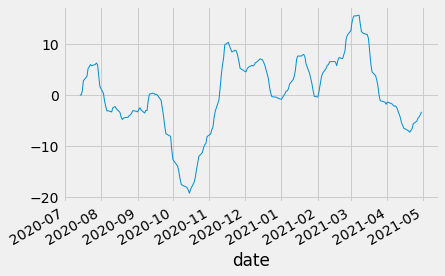

In [128]:
df['macd'].plot(linewidth = 1)

#### Visualising the two lines' (MACD and signal line) cross which indicates whether to buy or sell. 

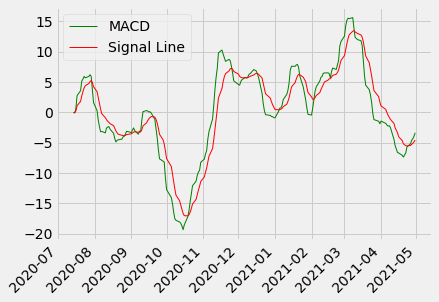

In [120]:
import matplotlib.pyplot as plt

plt.plot(df.macd, label='MACD', color = 'GREEN',linewidth = 1.0)
plt.plot(df.macds, label='Signal Line', color='RED',linewidth= 1.0)
#plt.plot(df.macdh, label='Difference', color='BLUE',linewidth= 1.0)
#plt.hist(df.macdh, bins=50)
#mpf.make_addplot(spy['Histogram'][-100:], panel=1, type='bar', color='purple', secondary_y=False)

plt.legend(loc='upper left')
plt.xticks(rotation=45, ha='right')

fig1=plt.show()
fig1

#### Visualising the histogram that shows the spread between the two MACD lines.

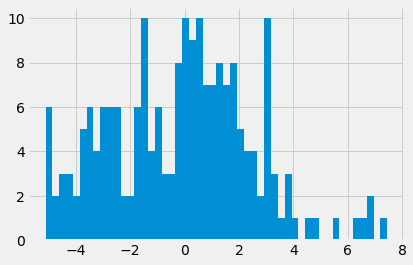

In [127]:
plt.hist(df.macdh, bins=50)
plt.show()

# Buy or Sell Recommendation.

In [130]:
df

,prev close,open,high,low,last,close,vwap,volume,turnover,trades,deliverable volume,%deliverble,macd,macds,macdh,Buy_Signal_Price,Sell_Signal_Price
date,,,,,,,,,,,,,,,,,
2020-07-14,379.95,379.50,385.90,372.10,373.60,373.75,378.51,4741344,1.794635e+14,76901.0,1098291.0,0.2316,0.000000,0.000000,0.000000,NaN,NaN
2020-07-15,373.75,377.85,382.35,368.20,369.00,369.60,374.19,4903936,1.834985e+14,57972.0,1082728.0,0.2208,-0.093109,-0.051727,-0.041382,NaN,369.6
2020-07-16,369.60,372.75,396.25,360.30,395.10,393.90,381.75,13308018,5.080337e+14,138380.0,3333733.0,0.2505,0.634902,0.229678,0.405224,393.9,NaN
2020-07-17,393.90,404.50,447.40,392.00,442.85,443.80,427.59,53842324,2.302231e+15,511790.0,8139989.0,0.1512,2.752077,1.084149,1.667927,NaN,NaN
2020-07-20,443.80,441.00,448.00,435.10,436.35,437.30,440.99,14373074,6.338333e+14,175415.0,1529617.0,0.1064,3.585929,1.828372,1.757557,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,423.05,426.00,428.35,417.55,417.60,418.90,421.33,6444098,2.715060e+14,68579.0,2408600.0,0.3738,-5.181929,-5.453366,0.271437,418.9,NaN
2021-04-27,418.90,417.50,423.10,416.55,420.00,420.35,420.45,5408165,2.273853e+14,45282.0,2300523.0,0.4254,-4.610254,-5.284744,0.674490,NaN,NaN
2021-04-28,420.35,422.00,424.35,414.90,417.15,417.50,419.33,9902533,4.152459e+14,59529.0,5176820.0,0.5228,-4.337172,-5.095229,0.758057,NaN,NaN


#### Crossover- Change in the momentum/trend of the stock price has occurred. 

#### Buy signal- If crossover occurs below the zero line and MACD line crosses the signal line from bottom to top.
#### Sell signal- If crossover occurs above the zero line and MACD line crossed the signal line from top to bottom.

## Generating buy/sell signals.

In [113]:
def buy_sell(macds):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(macds)):
    #if MACD > signal line  then buy else sell
      if df['macd'][i] > df['macds'][i]:
        if flag != 1:
          sigPriceBuy.append(df['close'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      elif df['macd'][i] < df['macds'][i]: 
        if flag != 0:
          sigPriceSell.append(df['close'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [114]:
#buy and sell columns
x = buy_sell(df)
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]

df

,prev close,open,high,low,last,close,vwap,volume,turnover,trades,deliverable volume,%deliverble,macd,macds,macdh,Buy_Signal_Price,Sell_Signal_Price
date,,,,,,,,,,,,,,,,,
2020-07-14,379.95,379.50,385.90,372.10,373.60,373.75,378.51,4741344,1.794635e+14,76901.0,1098291.0,0.2316,0.000000,0.000000,0.000000,NaN,NaN
2020-07-15,373.75,377.85,382.35,368.20,369.00,369.60,374.19,4903936,1.834985e+14,57972.0,1082728.0,0.2208,-0.093109,-0.051727,-0.041382,NaN,369.6
2020-07-16,369.60,372.75,396.25,360.30,395.10,393.90,381.75,13308018,5.080337e+14,138380.0,3333733.0,0.2505,0.634902,0.229678,0.405224,393.9,NaN
2020-07-17,393.90,404.50,447.40,392.00,442.85,443.80,427.59,53842324,2.302231e+15,511790.0,8139989.0,0.1512,2.752077,1.084149,1.667927,NaN,NaN
2020-07-20,443.80,441.00,448.00,435.10,436.35,437.30,440.99,14373074,6.338333e+14,175415.0,1529617.0,0.1064,3.585929,1.828372,1.757557,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,423.05,426.00,428.35,417.55,417.60,418.90,421.33,6444098,2.715060e+14,68579.0,2408600.0,0.3738,-5.181929,-5.453366,0.271437,418.9,NaN
2021-04-27,418.90,417.50,423.10,416.55,420.00,420.35,420.45,5408165,2.273853e+14,45282.0,2300523.0,0.4254,-4.610254,-5.284744,0.674490,NaN,NaN
2021-04-28,420.35,422.00,424.35,414.90,417.15,417.50,419.33,9902533,4.152459e+14,59529.0,5176820.0,0.5228,-4.337172,-5.095229,0.758057,NaN,NaN


#### Plotting the generated buy and sell signals gives an overview of the price trends. 

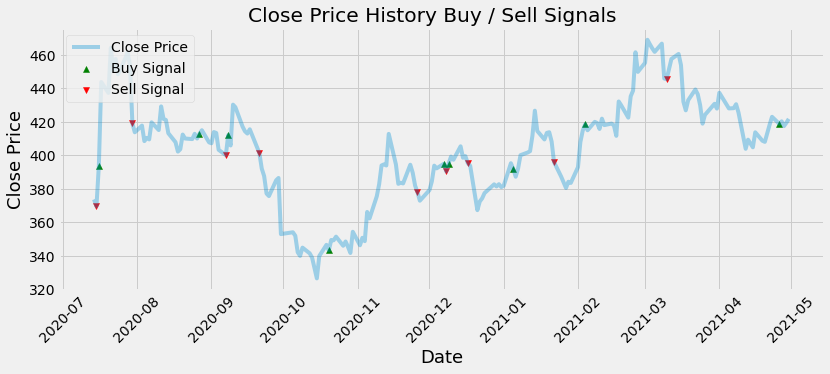

In [132]:
 title = 'Close Price History Buy / Sell Signals   '
#stocks
my_stocks = df

plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( my_stocks['close'],  label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.legend( loc='upper left')
plt.show()

#### Conclusion: The above plot shows the time periods where we would've profited by following this buy and sell strategy.

#### We used few number of days to test it. Many more ways can be explored for the same.

#### For example, LSTM model and such can be used further, to predict the next opening and closing prices as well as a part of the stock movement analysis.

### Author- Mukut Chakraborty.